In [1]:
import json
import glob

def lire_json(chemin):
    with open(chemin, "r", encoding="utf-8") as fin:
        dic = json.load(fin)
    return dic

def ecrire_json(chemin, dic):
    with open(chemin, "w", encoding="utf-8") as fout:
        fout.write(json.dumps(dic, ensure_ascii=False, indent=2))

In [2]:
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

print(len(dic))

5685


In [92]:
new_dic = {}

for k, v in dic.items():
    mots = []
    tags = []
    for mot, tag in v[1]:
        mots.append(mot)
        tags.append(tag)
    new_dic[k] = []
    new_dic[k].append(mots)
    new_dic[k].append(tags)
    
print(len(new_dic))

for k, v in new_dic.items():
    print(k, v)
    break

5685
french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498 [['Identification', 'de', 'trois', 'gènes', 'expliquant', 'la', 'virulence', 'de', 'la', 'grippe', 'espagnole', 'de', '1918'], ['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']]


In [90]:
articles = [x for x in new_dic.keys()]
print(articles[0])

liste_tags = [x[1] for x in new_dic.values()]

print(liste_tags[:3])

french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498
[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]


In [95]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

model = KMeans(n_clusters=10)

V = CountVectorizer()

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0 1 0 0 4 2 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 0 0 5 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [96]:
model.fit(X)

all_predictions = model.predict(X)

print(all_predictions[:100])

[6 0 5 5 2 2 5 2 9 1 3 6 2 2 5 0 0 5 2 5 0 0 5 0 6 5 6 0 0 9 0 1 7 6 9 5 1
 1 7 7 1 7 1 1 1 5 7 5 6 2 5 9 5 0 1 0 6 1 0 6 5 6 9 0 5 5 0 5 7 5 6 2 5 0
 0 6 1 2 9 6 1 2 2 7 6 0 5 5 5 1 7 5 2 6 2 2 2 5 7 7]


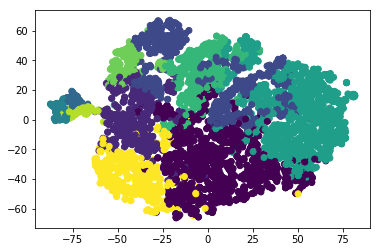

In [97]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(X)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.savefig("test.png")
plt.show()